<a href="https://colab.research.google.com/github/zsakhtar/data/blob/master/Covid19_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

In [2]:
img_tr = np.load("trainimage.npy")
img_ts = np.load("testimage.npy")
labels_tr = pd.read_csv("trainLabels.csv")
labels_ts = pd.read_csv("testLabels.csv")

In [3]:
print(img_tr.shape)
print(img_ts.shape)
print(labels_tr.shape)
print(labels_ts.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)
(251, 1)
(66, 1)


In [4]:
labels_tr.isnull().any()

Label    False
dtype: bool

In [5]:
labels_ts.isnull().any()

Label    False
dtype: bool

In [6]:
## no null values in the labels file

Label    Viral Pneumonia
Name: 0, dtype: object
Label    Viral Pneumonia
Name: 1, dtype: object
Label    Viral Pneumonia
Name: 2, dtype: object
Label    Viral Pneumonia
Name: 3, dtype: object
Label    Viral Pneumonia
Name: 4, dtype: object
Label    Viral Pneumonia
Name: 5, dtype: object
Label    Viral Pneumonia
Name: 6, dtype: object
Label    Viral Pneumonia
Name: 7, dtype: object


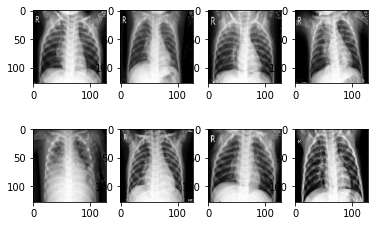

In [7]:
#example images of trainimage and their labels
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(img_tr[i])
  print(labels_tr.loc[i])

Label    Viral Pneumonia
Name: 0, dtype: object
Label    Viral Pneumonia
Name: 1, dtype: object
Label    Viral Pneumonia
Name: 2, dtype: object
Label    Viral Pneumonia
Name: 3, dtype: object
Label    Viral Pneumonia
Name: 4, dtype: object
Label    Viral Pneumonia
Name: 5, dtype: object
Label    Viral Pneumonia
Name: 6, dtype: object
Label    Viral Pneumonia
Name: 7, dtype: object


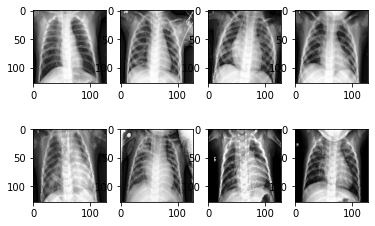

In [8]:
# example images of testimage and their labels
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(img_ts[i])
  print(labels_ts.loc[i])

In [9]:
print(labels_tr.value_counts())
print(labels_ts.value_counts())

Label          
Covid              111
Viral Pneumonia     70
Normal              70
dtype: int64
Label          
Covid              26
Viral Pneumonia    20
Normal             20
dtype: int64


In [10]:
# no null values as the number of records in .shape and sum of unique labels are equal for both train and test

In [11]:
# data preprocessing

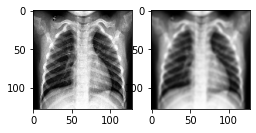

In [12]:
# Gaussian blurring
preprocessed = []
for i in img_tr:
  blur = cv2.GaussianBlur(i, (5,5), 0)
  preprocessed.append(blur)

plt.subplot(1,3,1)
plt.imshow(i)    # original image
plt.subplot(1,3,2) 
plt.imshow(blur) # blur image

preprocessed = np.asarray(preprocessed)

In [13]:
preprocessed

array([[[[ 25,  25,  25],
         [ 29,  29,  29],
         [ 37,  37,  37],
         ...,
         [128, 128, 128],
         [123, 123, 123],
         [118, 118, 118]],

        [[ 25,  25,  25],
         [ 29,  29,  29],
         [ 35,  35,  35],
         ...,
         [126, 126, 126],
         [123, 123, 123],
         [117, 117, 117]],

        [[ 24,  24,  24],
         [ 27,  27,  27],
         [ 32,  32,  32],
         ...,
         [123, 123, 123],
         [125, 125, 125],
         [122, 122, 122]],

        ...,

        [[  6,   6,   6],
         [  8,   8,   8],
         [  9,   9,   9],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1]],

        [[ 11,  11,  11],
         [ 18,  18,  18],
         [ 26,  26,  26],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[ 14,  14,  14],
         [ 26,  26,  26],
         [ 37,  37,  37],
         ...,
         [  0,   0,   0],
        

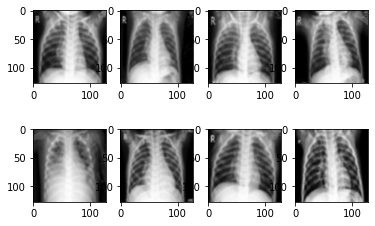

In [14]:
#example blur images
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(preprocessed[i])

In [15]:
#normalization 
# since its greyscale, divide it by 255
preprocessed = preprocessed / 255

In [16]:
preprocessed

array([[[[0.09803922, 0.09803922, 0.09803922],
         [0.11372549, 0.11372549, 0.11372549],
         [0.14509804, 0.14509804, 0.14509804],
         ...,
         [0.50196078, 0.50196078, 0.50196078],
         [0.48235294, 0.48235294, 0.48235294],
         [0.4627451 , 0.4627451 , 0.4627451 ]],

        [[0.09803922, 0.09803922, 0.09803922],
         [0.11372549, 0.11372549, 0.11372549],
         [0.1372549 , 0.1372549 , 0.1372549 ],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48235294, 0.48235294, 0.48235294],
         [0.45882353, 0.45882353, 0.45882353]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.10588235, 0.10588235, 0.10588235],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.48235294, 0.48235294, 0.48235294],
         [0.49019608, 0.49019608, 0.49019608],
         [0.47843137, 0.47843137, 0.47843137]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255]

In [17]:
# converting labels to one hot encoding

In [18]:
from sklearn.preprocessing import LabelBinarizer
binary = LabelBinarizer()
tr_ohe = binary.fit_transform(labels_tr)

In [19]:
tr_ohe

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [20]:
print(img_tr.shape)
print(img_ts.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)


In [21]:
img_tr_1 = img_tr.reshape(img_tr.shape[0], 128, 128, 3)
img_ts_1 = img_ts.reshape(img_ts.shape[0], 128, 128, 3)

In [22]:
print(img_tr_1.shape)
print(img_ts_1.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)


In [23]:
# building CNN

In [24]:

model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), strides = (2,2), activation= "relu",padding="same", input_shape = (128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (5,5), strides = (2,2), activation= "relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(12, activation="softmax"))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [26]:
#optimizing and loss function
from tensorflow.keras.optimizers import Adam
optimize = Adam(learning_rate = 0.001,
                beta_1 = 0.9,
                beta_2 = 0.999,
                epsilon = 1e-07,
                amsgrad = False,
                name = "Adam"
                )
model.compile(optimizer = optimize, loss = "categorical_crossentropy", metrics = "accuracy")
